In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np

In [7]:
train= ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset= train.flow_from_directory('C:/Users/austi/anaconda3/envs/ImageRecognitionBeta/01_LeCode/Notebooks/basedata/training/',batch_size=1,class_mode='binary')
validData= validation.flow_from_directory('C:/Users/austi/anaconda3/envs/ImageRecognitionBeta/01_LeCode/Notebooks/basedata/validation/',batch_size=1,class_mode='binary')

Found 9 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [9]:
print(train_dataset.class_indices)

{'circle': 0, 'square': 1, 'triangle': 2}


In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1, activation='softmax')
                                   ])
                    

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics =['accuracy'])

NameError: name 'RMSprop' is not defined

In [12]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch =3,
                      epochs=20
                     )

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [62]:
model.save('real_shiz')

INFO:tensorflow:Assets written to: real_shiz\assets


INFO:tensorflow:Assets written to: real_shiz\assets


In [63]:
nModel =  models.load_model('real_shiz.model')

OSError: No file or directory found at real_shiz.model

1/1 [==============================] - 0s 48ms/step
prediction
circle


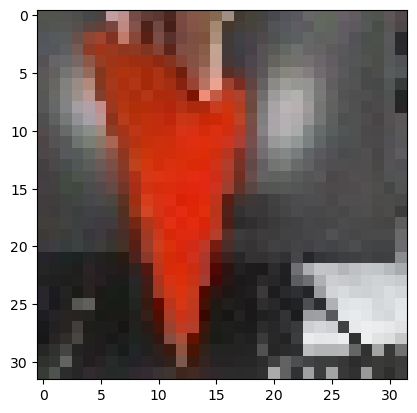

In [68]:
img = cv.imread('triangle.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
class_names=['circle','square','triangle']
plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img])/255)
index = np.argmax(prediction)
print('prediction')
print(class_names[index])